In [16]:
# ->
import os
import time
import cv2 as cv
import matplotlib.pyplot as plt
from IPython.display import display, Image
from IPython.display import clear_output
import ipywidgets as widget
import threading
import numpy as np
from pycoral.utils import edgetpu
from pycoral.utils import dataset
from pycoral.adapters import common
from pycoral.adapters import classify
from PIL import Image, ImageOps
from imutils.video import VideoStream
import imutils

In [4]:
# ->
# Specify the TensorFlow model, labels, and image
#script_dir = pathlib.Path('/home/mendel').parent.absolute()
model_file = 'handwriting_model2_quant_edgetpu.tflite'
label_file = 'digits_labels.txt'
#image_file = '2_img.GIF'

In [5]:
# ->
# Initialize the TF interpreter
interpreter = edgetpu.make_interpreter(model_file)
interpreter.allocate_tensors()
size = common.input_size(interpreter)
# extract labels
labels = dataset.read_label_file(label_file)

In [6]:
# ->
# initialise video streamer
vs = VideoStream(src=1).start()
print("starting video stream...")
time.sleep(2.0)


starting video stream...


In [10]:
# creating stop button widget
stopButton = widget.ToggleButton(
    value=False,
    description='Stop',
    disabled=False,
    button_style='danger', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='square' # (FontAwesome names without the `fa-` prefix)
)

In [11]:
# display function
def view(button_arg):
    cap = cv.VideoCapture(0)
    display_handle=display(None, display_id=True)
    i = 0
    while True:
        _, frame = cap.read()
        frame = cv.flip(frame, 1) # if your camera reverses your image
        _, frame = cv.imencode('.jpeg', frame)
        display_handle.update(Image(data=frame.tobytes()))
        if stopButton.value==True:
            cap.release()
            display_handle.update(None)


In [12]:
# run widget video stream
display(stopButton)
thread = threading.Thread(target=view, args=(stopButton,))
thread.start()

ToggleButton(value=False, button_style='danger', description='Stop', icon='square', tooltip='Description')

None

Exception in thread Thread-8:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 917, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 865, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipykernel_4189/3220669151.py", line 10, in view
    display_handle.update(Image(data=frame.tobytes()))
TypeError: 'module' object is not callable



[ WARN:6@1852.264] global /io/opencv/modules/videoio/src/cap_v4l.cpp (902) open VIDEOIO(V4L2:/dev/video1): can't open camera by index


TypeError: Image data cannot be converted to float

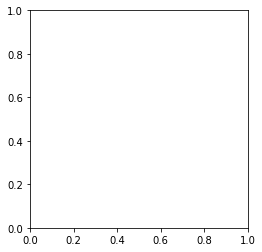

In [15]:
while True:
    camera = cv.VideoCapture(1)
    ret, frame = camera.read()
    plt.imshow(frame)
    plt.title('El Bruno - Office')
    plt.show()
    time.sleep(0.001)

In [2]:

while True:
    frame = vs.read()
    #frame = imutils.resize(frame, width=500)
    #frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    plt.imshow(frame)
    plt.show()
    time.sleep(0.1)
    clear_output(wait=True)

KeyboardInterrupt: 

In [ ]:
# creating video capture object for live testing
capture = cv.VideoCapture(0)
result, img = capture.read()
if result:
    cv.imshow("Testing", img)

In [ ]:
# camera streaming test
frame = vs.read()
frame = imutils.resize(frame, width=500)
test = frame.copy()
cv.imshow("Test Frame", test)
key = cv.waitKey(1) & 0xFF
cv.destroyAllWindows()
vs.stop()

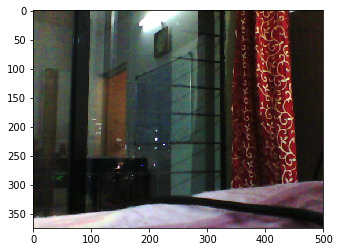

[Class(id=7, score=0.99609375)]


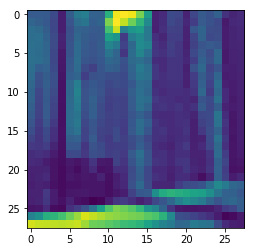

In [ ]:
# ->
# looping over frames and inferencing
while True:
    # take the frame from the threaded video stream and resize to maximum width of 500 pixels
    frame = vs.read()
    frame = imutils.resize(frame, width=500)  
    # prepare the frame for classification by converting it from
    # BGR to RGB channel ordering and then from a NumPy array to PIL image format
    frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    # frame image preprocessing
    #frame_img = Image.fromarray(frame)
    img = ImageOps.grayscale(Image.fromarray(frame))
    frame_arr = np.array(img.resize(size, Image.ANTIALIAS))
    # broadcasting frame_img to fit dimentions (28, 28, 1)
    frame_arr_trfm = frame_arr.reshape((28,28,1))
    common.set_input(interpreter, frame_arr_trfm)
    
    # execute inference
    interpreter.invoke()
    classes = classify.get_classes(interpreter, top_k=1)
    # display stream and print result
    plt.imshow(frame)
    plt.show()
    print(classes)
    plt.imshow(frame_arr)
    plt.show()
    #frame = imutils.resize(frame, width=500)
    #frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    
#     # show the output frame and wait for a key press
#     cv.imshow("Frame", orig)
#     key = cv.waitKey(1) & 0xFF

#     # if the `q` key was pressed, break from the loop
#     if key == ord("q"):
#         break
    time.sleep(1)
    clear_output(wait=True)
    
cv.destroyAllWindows()
vs.stop()

In [4]:
# ->
# Model must be uint8 quantized
if common.input_details(interpreter, 'dtype') != np.uint8:
    raise ValueError('Only support uint8 input type.')

In [5]:
# testing image
try: 
    img  = Image.open(image_file) 
    img.show()
except IOError:
    pass

In [66]:
# Resize the image
size = common.input_size(interpreter)
print(size)
image = Image.open(image_file).convert('RGB').resize(size, Image.ANTIALIAS)
img_array = np.array(Image.open(image_file).convert('RGB').resize(size, Image.ANTIALIAS))
#print(image.size)


(28, 28)


In [14]:
# ->
# resizing with greyscale
size = common.input_size(interpreter)
#image = Image.open(image_file).convert('L').resize(size, Image.ANTIALIAS)
img_array = np.array(Image.open(image_file).convert('L').resize(size, Image.ANTIALIAS))


In [8]:
# getting image size 
im = cv.imread('1_img.GIF')
print(im.shape)

AttributeError: 'NoneType' object has no attribute 'shape'

In [45]:
# broadcasting array
#image = np.array(np.zeros((28, 28)), np.ones((28,1))) + image
a = np.zeros((28,28,1))

for row in range(0,27):
    for col in range(0,27):
        a[row][col][0] = img_array[row][col]

print(a)
#print(img_array.shape)

ValueError: setting an array element with a sequence.

In [15]:
# ->
# first broadcasting img_array to fit dimentions (28, 28, 1)
img_array = img_array.reshape((28,28,1))
common.set_input(interpreter, img_array)

In [67]:
# default parameters for manual input processing
top_k = 1
threshold = 0.0
count = 1
input_mean = 128.0
input_std = 128.0

In [70]:
# Manual image preprocessing - 2 transfomrations: normalization and quantization
# combined in 1 line: q = (input - mean) / (std * scale) + zero_point
# 1e-5 used instead of 0 to prevent division by 0 error
params = common.input_details(interpreter, 'quantization_parameters')
print(params)
scale = params['scales']
zero_point = params['zero_points']

# default parameters used
mean = input_mean
std = input_std

if abs(scale * std - 1) < 1e-5 and abs(mean - zero_point) < 1e-5:
    # Input data does not require preprocessing.
    print('no preprocessing required')
    common.set_input(interpreter, image)
else:
    # Input data requires preprocessing
    print('image preprocessed')
    img_array = img_array.reshape((28,28,1))
    normalized_input = (img_array - mean) / (std * scale) + zero_point
    np.clip(normalized_input, 0, 255, out=normalized_input)
    common.set_input(interpreter, normalized_input.astype(np.uint8))


{'scales': array([1.], dtype=float32), 'zero_points': array([0], dtype=int32), 'quantized_dimension': 0}
image preprocessed


In [16]:
# ->
# Run an inference
#common.set_input(interpreter, img_array)
interpreter.invoke()
classes = classify.get_classes(interpreter, top_k=1)
print(classes)

[Class(id=2, score=0.859375)]


In [17]:
# Print the result
labels = dataset.read_label_file(label_file)
print("class | score")
for c in classes:
    print('%s     | %.5f' % (labels.get(c.id, c.id), c.score))
    #print(c.score)

class | score
2     | 0.85938
